In [1]:
# import libraly
import pandas as pd

from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource, FactorRange
from bokeh.plotting import figure , show

import io
import requests
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt

from bokeh.io import show
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral6
from bokeh.plotting import figure
from bokeh.transform import factor_cmap
import holoviews as hv

import geopandas as gdp
import io

import pandas as pd
import geopandas as gpd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import datetime
import io
import PIL

from tqdm import trange, tqdm

In [2]:
# import data from google sheet and address

gsheetid = '1F4REo2R1FOVpmzyeXRTfSlzcP0UDru53kAHh_ToCi2Y'
sheet_name = 'Data'

try : 
    gshees_url = f'https://docs.google.com/spreadsheets/d/{gsheetid}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
    data = pd.read_csv(gshees_url)
    url = 'https://raw.githubusercontent.com/spicydog/thailand-province-district-subdistrict-zipcode-latitude-longitude/master/output.csv'
    read_data = requests.get(url).content
except:
    print('can\'t import data from google sheet ')
    
address = pd.read_csv(io.StringIO(read_data.decode('utf-8')))

In [3]:
# create a class for contain all values 
class data_covid19 : 
    def __init__(self) -> None:
        self.data_covid19_all = list()
        self.data_address = list()
        self.provinces = list()
        self.data_covid19_divide = dict()
        self.provinces_count = dict()
        self.map_lat = list()
        self.map_lon = list()
        self.map_provinces_count = list()
        self.map_provinces = list()
        self.map_nationality = list()
        self.map_gender = list()
        self.map_age_range = list()
        self.map_age_number = list()
        self.map_provinces_2 = list()
        self.map_len_province = list()
        
    data_covid19_all = list()
    data_address = list()
    provinces = list()
    data_covid19_divide = dict()
    provinces_count = dict()
    map_lat = list()
    map_lon = list()
    map_provinces_count = list()
    map_provinces = list()
    map_nationality = list()
    map_gender = list()
    map_age_range = list()
    map_age_number = list()
    map_provinces_2 = list()
    map_len_province = list()


In [4]:
# convert pandas.core.frame.Datafrmae to list
try :  
    data_covid19.data_covid19_all = data.values.tolist()
    data_covid19.data_address = address.values.tolist()
except : 
    print('can\'t convert pandas.core.frame.Datafrmae to list ')

In [5]:
# print(data_covid19.data_address) # ['กรุงเทพมหานคร', 'พระนคร', 'พระบรมมหาราชวัง', 10200, 13.751, 100.492]

for i in data_covid19.data_address : 
    if i[0] in data_covid19.provinces :
        pass
    else : 
        data_covid19.provinces.append(i[0])

In [6]:
run_num = 0

while True :

    if run_num >= len(data_covid19.provinces) : 
        break

    # pass data to data_covid19.data_covid19_divide
    # data_covid19_divide = {
    #     'province' : {
    #         1 : {
    #             'txn_date' : '',
    #             'id' : 1,
    #             'gender' : 'Male',
    #             'age_number' : 1, 
    #             'age_range' : '10 - 19 ปี',
    #             'nationality' : 'thai', 
    #             'job' : 'nan',
    #             'risk' : 'อื่นๆ', 
    #             'patien_type' : '10.อื่นๆ',
    #             'update' : '29/9/2021 7:43'
    #         }
    #     }
    # }
    data_covid19.data_covid19_divide[data_covid19.provinces[run_num]] = dict()    # 'province' : {}
    run_num2 = 1
    for i in data_covid19.data_covid19_all : 
        #          0           1       2     3       4         5      6    7        8        9              10     
        # i = ['29/9/2021', 1569035, 'ชาย', 19.0, '10-19 ปี', 'Thai', nan, 'อื่นๆ', '10.อื่นๆ', 'เพชรบุรี', '29/9/2021 7:43']
        if i[9] == data_covid19.provinces[run_num] :
            data_covid19.data_covid19_divide[data_covid19.provinces[run_num]][run_num2] = dict()    # 'province' : { 1:{} }
            data_covid19.data_covid19_divide[data_covid19.provinces[run_num]][run_num2]['txn_date'] = i[0]    # 'province' : { 1:{'txn_date' : n} }
            data_covid19.data_covid19_divide[data_covid19.provinces[run_num]][run_num2]['id'] = i[1]
            data_covid19.data_covid19_divide[data_covid19.provinces[run_num]][run_num2]['gender'] = i[2]
            data_covid19.data_covid19_divide[data_covid19.provinces[run_num]][run_num2]['age_number'] = i[3]
            data_covid19.data_covid19_divide[data_covid19.provinces[run_num]][run_num2]['age_range'] = i[4]
            data_covid19.data_covid19_divide[data_covid19.provinces[run_num]][run_num2]['nationality'] = i[5]
            data_covid19.data_covid19_divide[data_covid19.provinces[run_num]][run_num2]['job'] = i[6]
            data_covid19.data_covid19_divide[data_covid19.provinces[run_num]][run_num2]['risk'] = i[7]
            data_covid19.data_covid19_divide[data_covid19.provinces[run_num]][run_num2]['patien_type'] = i[8]
            data_covid19.data_covid19_divide[data_covid19.provinces[run_num]][run_num2]['update'] = i[10]
            run_num2 += 1
    run_num += 1


# count the number of infected people in provinces
# provinces_count = {
#     'province' : count of infected people in provinces
# }

for i in data_covid19.provinces :
    data_covid19.provinces_count[i] = len(data_covid19.data_covid19_divide[i])
    data_covid19.map_provinces_count.append(len(data_covid19.data_covid19_divide[i]))
    data_covid19.map_provinces.append

provinces = []

# province,district,subdistrict,zipcode,latitude,longitude
# ['กรุงเทพมหานคร', 'พระนคร', 'พระบรมมหาราชวัง', 10200, 13.751, 100.492]

for i in data_covid19.data_address : 
    if np.isnan(i[4]):
        pass
    elif i[0] in provinces :
        pass
    else : 
        provinces.append(i[0])
        data_covid19.map_lat.append(i[4])
        data_covid19.map_lon.append(i[5])


# Debug nationality
for i in data_covid19.provinces :
    run_num_nationality = 1
    while True : 
        if run_num_nationality >= len(data_covid19.data_covid19_divide[i]) :
            break
        
        if type(data_covid19.data_covid19_divide[i][run_num_nationality]['nationality']) is str : 
            pass
        else : 
            data_covid19.data_covid19_divide[i][run_num_nationality]['nationality'] = 'อื่น ๆ'

        run_num_nationality += 1

# Debug age_number
for i in data_covid19.provinces :
    run_num_nationality = 1
    while True : 
        if run_num_nationality >= len(data_covid19.data_covid19_divide[i]) :
            break
        
        if np.isnan(data_covid19.data_covid19_divide[i][run_num_nationality]['age_number']): 
            data_covid19.data_covid19_divide[i][run_num_nationality]['age_number'] = 0
        run_num_nationality += 1


for i in data_covid19.provinces :
    run_num_nationality = 1
    while True : 
        if run_num_nationality >= len(data_covid19.data_covid19_divide[i]) :
            break
        
        data_covid19.map_nationality.append(data_covid19.data_covid19_divide[i][run_num_nationality]['nationality'])
        data_covid19.map_gender.append(data_covid19.data_covid19_divide[i][run_num_nationality]['gender'])
        data_covid19.map_age_range.append(data_covid19.data_covid19_divide[i][run_num_nationality]['age_range'])
        data_covid19.map_age_number.append(data_covid19.data_covid19_divide[i][run_num_nationality]['age_number'])
        data_covid19.map_provinces_2.append(i)
        data_covid19.map_len_province.append(len(data_covid19.data_covid19_divide[i]))
        
        run_num_nationality += 1



In [7]:
def graph() :
    maps = {'centroid_lat' : data_covid19.map_lat, 'centroid_lon' : data_covid19.map_lon, 'count' : data_covid19.map_provinces_count,'province' : data_covid19.provinces}
    maps = pd.DataFrame(maps) 

    fig = px.scatter_mapbox(maps, lat="centroid_lat", lon="centroid_lon", color="count",size='count',
                    color_continuous_scale=px.colors.cyclical.Edge_r, size_max=20, zoom=3.5,
                    mapbox_style="carto-positron")
    fig.show()

    map_sunburst = {'nationality' : data_covid19.map_nationality, 'province' : data_covid19.map_provinces_2, 'gender' : data_covid19.map_gender ,'age_range' : data_covid19.map_age_range , 'age_number' : data_covid19.map_age_number , 'coun_people' : data_covid19.map_len_province}

    df = pd.DataFrame(map_sunburst)
    # prepare a sunburst figure
    fig = px.sunburst(df, path=['nationality', 'province', 'gender', 'age_range'], values='coun_people',
                    color='coun_people', hover_data=['age_range'],
                    color_continuous_scale='twilight',
                    color_continuous_midpoint=np.average(df['coun_people'], weights=df['age_number']))
    fig.show()

    def clean_text(a_string): return a_string.replace("\t", "")

    def change_format(a_string):
        if len(a_string) == 1: return "0"+a_string
        else: return a_string

    def to_date_obj(a_string):
        d, m, y = a_string.split("/")
        d = change_format(d); m = change_format(m)
        date_str = d+m+y

        format_str = '%d%m%Y' # The format
        datetime_obj = datetime.datetime.strptime(date_str, format_str)
        return datetime_obj.date()


    tha_map = gpd.read_file("./data/THA_MAP.shp")
    provice_name = pd.read_csv("./data/Province_NAME.csv", index_col=None); del provice_name["Index"]
    provice_name["NAME"] = provice_name["NAME"].apply(clean_text)

    tha_map["NAME"] = provice_name["NAME"]
    tha_map["Province"] = provice_name["Province"]
    tha_map = tha_map.sort_values(by="NAME")

    del provice_name





    cv_cases = pd.read_csv("./data/confirmed-cases-data.csv")
    cv_cases = cv_cases.dropna()
    cv_cases["announce_date"] = cv_cases["announce_date"].apply(to_date_obj)






    all_dates = sorted(list(set(cv_cases.announce_date)))
    pvs = sorted(list(set(cv_cases.province_of_onset.values)))






    # Ensure the same provinces
    tmp = sorted(list(set(tha_map.NAME.values)))
    for i, e in enumerate(sorted(list(set(tha_map.NAME.values)))):
        if e != tmp[i]: print(e)
    del tmp






    bkk = pvs[1]






    bkk_cv_cases = cv_cases[cv_cases.province_of_onset == bkk]
    bkk_cv_cases = bkk_cv_cases.groupby(["announce_date"], as_index=False).sum()
    bkk_cv_cases = bkk_cv_cases.sort_values(by="announce_date")







    init = [0 for i in range(len(all_dates))]
    for i, d in enumerate(all_dates):
        case = bkk_cv_cases[bkk_cv_cases.announce_date==d]["case"].values
        if len(case) > 0: init[i] = case[0]






    rows = []
    for province in pvs:
        province_cv_cases = cv_cases[cv_cases.province_of_onset == province]
        province_cv_cases = province_cv_cases.groupby(["announce_date"], as_index=False).sum()
        province_cv_cases = province_cv_cases.sort_values(by="announce_date")
        init = [0 for i in range(len(all_dates))]
        for i, d in enumerate(all_dates):
            case = province_cv_cases[province_cv_cases.announce_date==d]["case"].values
            if len(case) > 0: init[i] = case[0]
        rows.append(init)





    rows = np.array(rows, dtype=np.int32)






    new_cv_cases = pd.DataFrame(rows, columns=list(map(str, all_dates)))
    new_cv_cases["index"] = pvs
    new_cv_cases["index"] = new_cv_cases["index"].astype(str)






    tha_map["NAME"] = tha_map["NAME"].astype(str)
    tha_map = tha_map.reset_index()
    tha_map = tha_map[["geometry", "NAME"]]



    new_list = list()
    new_list_province = sorted(data_covid19.provinces)


    for i in new_list_province :
        count = data_covid19.provinces_count[i]
        new_list.append(count)

    new_list = {'province' : new_list}

    new_list = pd.DataFrame(new_list)

    merge = tha_map.join(new_list, how="right")




    # Plot
    bins = [0, 10, 100, 500, 1000, 2000]

    ax = merge.plot(column = 'province', 
                    cmap = 'OrRd',
                    figsize = (10, 15),
                    legend = True,
                    scheme = 'user_defined',
                    classification_kwds = {'bins':bins},
                    edgecolor = 'black',
                    linewidth = 0.4)



    # Removing the axes
    ax.set_axis_off()

    # Move the legend 
    ax.get_legend()


    img = ax.get_figure()

    f = io.BytesIO()
    img.savefig(f, format = 'png', bbox_inches = 'tight')
    f.seek(0)

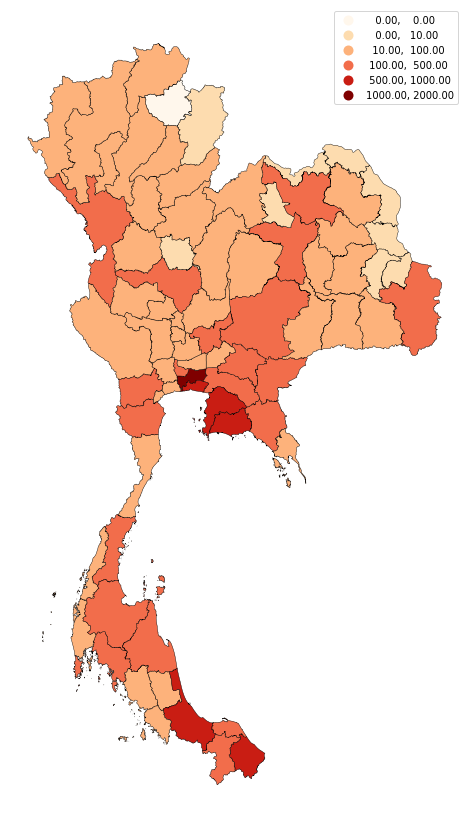

In [8]:
graph()